In [1]:
import pandas as pd
import mysql.connector

In [2]:
# Making a connection

conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = 'Password'
)

In [8]:
# Importing the dataset

df = pd.read_sql_query("""
SELECT * FROM (SELECT 
CONCAT("Match-",CAST(ROW_NUMBER() OVER(ORDER BY ID) AS CHAR)) AS 'match_no',
SUM(batsman_run) AS 'runs_scored',
SUM(SUM(batsman_run)) OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS 'career_runs',
ROUND(AVG(SUM(batsman_run)) OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW), 2) AS 'career_avg',
ROUND(AVG(SUM(batsman_run)) OVER(ROWS BETWEEN 9 PRECEDING AND CURRENT ROW), 2) AS 'rolling_avg'
FROM campusx.ipl
WHERE batter = 'V Kohli'
GROUP BY ID) t
""", conn)

df

C:\Users\Arun\AppData\Local\Temp\ipykernel_16940\2977144419.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""


,match_no,runs_scored,career_runs,career_avg,rolling_avg
0,Match-1,1.0,1.0,1.00,1.00
1,Match-2,23.0,24.0,12.00,12.00
2,Match-3,13.0,37.0,12.33,12.33
3,Match-4,12.0,49.0,12.25,12.25
4,Match-5,1.0,50.0,10.00,10.00
...,...,...,...,...,...
210,Match-211,0.0,6509.0,30.85,16.30
211,Match-212,20.0,6529.0,30.80,17.80
212,Match-213,73.0,6602.0,31.00,20.30
213,Match-214,25.0,6627.0,30.97,22.70


In [5]:
# Now plotting 

import matplotlib.pyplot as plt
%matplotlib inline

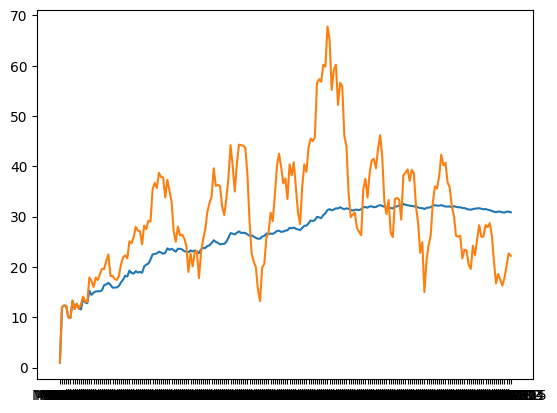

In [12]:
plt.plot(df['match_no'], df['career_avg'])
plt.plot(df['match_no'], df['rolling_avg'])
plt.show()